# Homework Assignment 3

# ID: 203842703 

Using the [Seattle Library Collection Inventory Dataset](https://www.kaggle.com/city-of-seattle/seattle-library-collection-inventory#library-collection-inventory.csv) and TuriCreate please, answer the following questions:

**Question 1:** Write a function that returns the most popular book in each subject. Use it to find the most popular book in
    the _Mystery Fiction_ subject (15pt)

In [3]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 51kB/s 
     |████████████████████████████████| 3.5MB 28.4MB/s 
     |████████████████████████████████| 327kB 43.5MB/s 
     |████████████████████████████████| 86.4MB 48kB/s 
     |████████████████████████████████| 3.6MB 18.3MB/s 
     |████████████████████████████████| 3.8MB 37.2MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 450kB 46.7MB/s 
     |████████████████████████████████| 18.3MB 251kB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=01b79c5228b5a8cdc040dd6c98829c25c343f1c627ec3169cb7ad055e2402c58
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=09fdeea0e1ba0270b5b7bd1b84b1e7ffb0843e2392c884ae467f477ea4ea1f74
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40a

In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os
# Installing the Kaggle package
!pip install kaggle 
#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"pelegbiton","key":"10ccd521f516fc2c5461ee248964d5f8"}

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/library-collection

# download the dataset from Kaggle and unzip it
!kaggle datasets download city-of-seattle/seattle-library-collection-inventory  -f library-collection-inventory.csv -p ./datasets/library-collection/
!unzip ./datasets/library-collection/*.zip  -d ./datasets/library-collection
!ls ./datasets/library-collection

100% 3.77G/3.77G [00:48<00:00, 58.7MB/s]
100% 3.77G/3.77G [00:48<00:00, 83.2MB/s]
Archive:  ./datasets/library-collection/library-collection-inventory.csv.zip
  inflating: ./datasets/library-collection/library-collection-inventory.csv  
library-collection-inventory.csv  library-collection-inventory.csv.zip


In [ ]:
import turicreate as tc
%matplotlib inline

#Loading a CSV to SFrame (this can take some time)
sf = tc.SFrame.read_csv("/content/datasets/library-collection/library-collection-inventory.csv", nrows=100000)#data size = 35531294 rows
sf

Successfully parsed 10 tokens: 
	0: 735439
	1: ["Genealog ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100 lines in 2.93376 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Successfully parsed 10 tokens: 
	0: 735439
	1: [Genealogy ... t.",,1947]
	2: 
	3: Enloes family
	4: arbk
	5: caref
	6: 
	7: cen
	8: 2017-09-01 ... :00:00.000
	9: 1

1 lines failed to parse correctly

Finished parsing file /content/datasets/library-collection/library-collection-inventory.csv

Parsing completed. Parsed 100000 lines in 1.11652 secs.

BibNum,Title,Author,ISBN,PublicationYear
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie","1481425730, 1481425749,9781481425735, ...",2014.
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999."
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.
1907265,The Paris pilgrims : anovel / Clancy Carlile. ...,"Carlile, Clancy, 1930-",0786706155,c1999.
1644616,"Erotic by nature : acelebration of life, of ...",,094020813X,"1991, c1988."
1736505,Children of Cambodia'skilling fields : memoirs ...,,"0300068395, 0300078730",c1997.
1749492,Anti-Zionism : analyticalreflections / editors: ...,,091559773X,c1989.
3270562,Hard-hearted Highlander /Julia London. ...,"London, Julia","0373789998, 037380394X,9780373789993, ...",[2017]
3264577,The Sandcastle Empire /Kayla Olson. ...,"Olson, Kayla","0062484877, 9780062484871",2017.
3236819,Doctor Who. The return ofDoctor Mysterio / BBC ; ...,,,[2017]


In [ ]:
import re
r = re.compile('\\d{4}')
def get_year(y_str):
    l = r.findall(y_str) # take the first year
    if len(l) == 0:
        return None
    return int(l[0])

sf['year'] = sf['PublicationYear'].apply(lambda s: get_year(s))
sf['year']

dtype: int
Rows: 100000
[2014, 2003, 2014, 1999, 1991, 1997, 1989, 2017, 2017, 2017, 2014, 2015, 2006, 2017, 2017, 2015, 2016, 2015, 2016, 2008, 2016, 2000, 1960, 2000, 2014, 2014, 2014, 2005, 2008, 2004, 2015, 2012, 1983, 1987, 2014, 2011, 2005, 2012, 1973, 2016, 1958, 2012, 2016, 2009, 2016, 2008, 1982, 1974, 2012, 2001, 2016, 2009, 2017, 1981, 2013, 2011, 2014, 2014, 2002, 2016, 2011, 2017, 2015, 2000, None, 2013, 1988, 2017, None, 2013, 2016, 2016, 2007, 1971, 1945, 2016, 2010, 2012, 1994, 1974, 2001, 1905, 1995, 2002, 2011, 2007, 2011, 2011, 2002, 2010, 2012, 1990, 2003, 2011, 1998, 2013, 2009, None, 2013, 2015, ... ]

In [ ]:
sf2 = sf['BibNum', 'Title', 'Subjects', 'Author', 'year', 'ItemCount'] # to make things run faster, we create smaller SFrame
sf2['subject_list'] = sf2['Subjects'].apply(lambda s: s.split(","))
sf2['subject_list'] = sf2['subject_list'].apply(lambda l: [subject.strip() for subject in l])
sf2 = sf2.remove_column('Subjects')
# we want to remove the duplication of subject by specific books
sf2 = sf2.stack("subject_list", new_column_name="subject")
sf2

BibNum,Title,Author,year,ItemCount,subject
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie",2014,1,Musicians Fiction
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie",2014,1,Bullfighters Fiction
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie",2014,1,Best friends Fiction
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie",2014,1,Friendship Fiction
3011076,A tale of two friends /adapted by Ellie O'Ry ...,"O'Ryan, Ellie",2014,1,Adventure and adventurersFiction ...
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",2003,1,Ninja Japan Comic booksstrips etc ...
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",2003,1,Comic books strips etcJapan Translations into ...
2248846,"Naruto. Vol. 1, UzumakiNaruto / story and ar ...","Kishimoto, Masashi, 1974-",2003,1,Graphic novels
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-",2014,1,Duncan Jeremy Fictitiouscharacter Comic books ...
3209270,"Peace, love & Wi-Fi : aZITS treasury / by Jerry ...","Scott, Jerry, 1955-",2014,1,Teenagers United StatesComic books strips etc ...


In [ ]:
import turicreate.aggregate as agg
def get_most_pop_book_per_subject():
  g = sf2.groupby(['Title', 'subject'], {'Popularity': agg.SUM('ItemCount')})
  gg = g.groupby( 'subject', {'Popularity': agg.MAX('Popularity')})
  ggg = gg.join(g, on=['subject','Popularity'], how='left')
  return ggg.sort("Popularity", ascending=False)
most_pop_book_per_subject = get_most_pop_book_per_subject()
most_pop_book_per_subject
most_pop_book_per_subject[most_pop_book_per_subject['subject']=='Murder Fiction']

subject,Popularity,Title
Murder Fiction,20,Magpie murders / AnthonyHorowitz. ...


**Question 2**: Find the top-10 fiction subjects (5pt), and use Seaborn to visualize the number of items over time for each subject (15pt)
    

In [ ]:
top10_fictions = set(most_pop_book_per_subject[most_pop_book_per_subject['subject'].contains('Fiction')]['subject'][:10])
most_pop_book_per_subject[most_pop_book_per_subject['subject'].contains('Fiction')][:10]

subject,Popularity,Title
Fiction films,208,Arrival / ParamountPictures ; Filmnation ...
Australia Fiction,36,The light between oceans/ Touchstone Pictures ; ...
Married people Fiction,36,The light between oceans/ Touchstone Pictures ; ...
Foundlings Fiction,36,The light between oceans/ Touchstone Pictures ; ...
Fiction televisionprograms ...,28,The Americans. Thecomplete fourth season / ...
Neighbors Fiction,27,A man called Ove : anovel / Fredrik Backm ...
Older men Fiction,27,A man called Ove : anovel / Fredrik Backm ...
Families Fiction,21,Behold the dreamers : anovel / Imbolo Mbue. ...
Family secrets Fiction,21,Behold the dreamers : anovel / Imbolo Mbue. ...
Immigrants United StatesFiction ...,21,Behold the dreamers : anovel / Imbolo Mbue. ...


In [ ]:
top_sf = sf2[sf2['subject'].apply(lambda n: n in top10_fictions)]
top_sf = top_sf.groupby(['subject','year'], {'Popularity': agg.SUM('ItemCount')})
top_sf

subject,year,Popularity
Families Fiction,2017,106
Fiction films,2005,76
Fiction films,2010,181
Older men Fiction,2010,4
Married people Fiction,2007,2
Older men Fiction,2005,2
Families Fiction,1997,1
Neighbors Fiction,2014,41
Neighbors Fiction,2013,9
Fiction films,None,20


In [ ]:
top10_dict = {}
for n in top10_fictions:
    n_sf = top_sf[top_sf["subject"] == n].sort("year")
    top10_dict[n] = {"x": list(n_sf["year"]), "y":list(n_sf["Popularity"])  }

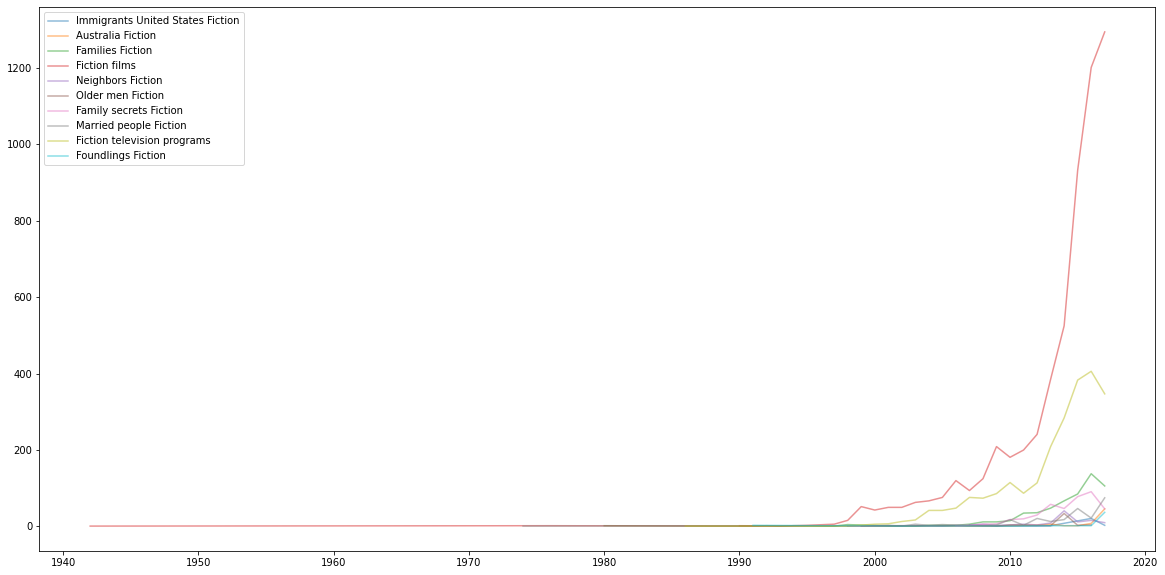

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10)) 
for n in top10_fictions:
    plt.plot(top10_dict[n]["x"], top10_dict[n]["y"], label=n,  alpha=0.5)
plt.legend()
plt.title("Fictions Popularity distribution over the years")
plt.ylabel('Fictions Popularity')
plt.xlabel('Years')
# plt.xlim(1900,2000)

**Question 3:** Write a function that gets as input a subject name. The function returns the top-20 most _popular_ authors for the input subject (15pt).



In [ ]:
def get_top20_pop_author_per_subject(subject_name):
  sf3 = sf2['BibNum', 'subject', 'Author'].unique()
  sf3 = sf3[sf3['subject']==subject_name]
  sf3 = sf3.groupby('Author', {"Popularity": agg.COUNT()}).sort("Popularity", ascending=False)
  return sf3[:20]
# x=get_top20_pop_author_per_subject('Older men Fiction')
x=get_top20_pop_author_per_subject('Families Fiction')
x.materialize()
x

Author,Popularity
"Attenberg, Jami",4
"Warner, GertrudeChandler, 1890-1979 ...",4
"Roth, Veronica",4
"Baszile, Natalie",3
"McCall Smith, Alexander,1948- ...",3
"Russo, Richard, 1949-",3
"Tropper, Jonathan",3
"Meloy, Maile",3
"Frankel, Laurie",3
"Snelling, Lauraine",2


In [ ]:
# def get_top20_pop_author_per_subject1(subject_name):
#   sf3 = sf2['BibNum', 'subject', 'Author','ItemCount']
#   sf3 = sf3[sf3['subject']==subject_name]
#   sf3 = sf3.groupby('Author', {"Popularity": agg.SUM('ItemCount')}).sort("Popularity", ascending=False)
#   return sf3[:20]
# # x=get_top20_pop_author_per_subject('Older men Fiction')
# x=get_top20_pop_author_per_subject1('Families Fiction')
# x.materialize()
# x

Using the [The Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) and TuriCreate, please answer the following questions:

**Question 4:** Calculate the average and median age of bloggers in each topic by gender(5pt). 
Calculate the average and median age of bloggers according to their sign (5pt). 
Visualize the age distributions  of bloggers according to their  topic and gender using Seaborn and PlotlyExpress(15pt)

In [57]:
!mkdir ./datasets
!mkdir ./datasets/BIU-Blog-Authorship
!wget -O ./datasets/BIU-Blog-Authorship/blogs.zip http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/BIU-Blog-Authorship’: File exists
--2021-03-27 11:53:42--  http://www.cs.biu.ac.il/~koppel/blogs/blogs.zip
Resolving www.cs.biu.ac.il (www.cs.biu.ac.il)... 132.70.196.72
Connecting to www.cs.biu.ac.il (www.cs.biu.ac.il)|132.70.196.72|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://www.cs.biu.ac.il/~koppel/blogs/blogs.zip [following]
--2021-03-27 11:53:43--  https://www.cs.biu.ac.il/~koppel/blogs/blogs.zip
Connecting to www.cs.biu.ac.il (www.cs.biu.ac.il)|132.70.196.72|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://u.cs.biu.ac.il/~koppel/blogs/blogs.zip [following]
--2021-03-27 11:53:44--  http://u.cs.biu.ac.il/~koppel/blogs/blogs.zip
Resolving u.cs.biu.ac.il (u.cs.biu.ac.il)... 132.70.196.109
Connecting to u.cs.biu.ac.il (u.cs.biu.ac.il)|132.70.196.109|:80... connected.
HTTP request sent, awaiting re

In [58]:
!unzip /content/datasets/BIU-Blog-Authorship/*.zip  -d /content/datasets/BIU-Blog-Authorship/

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002673.female.33.indUnk.Capricorn.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002831.male.23.indUnk.Aquarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4002909.female.27.indUnk.Virgo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003064.male.15.Student.Capricorn.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003080.female.16.indUnk.Cancer.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003093.male.26.Student.Leo.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003147.female.24.Tourism.Aries.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003245.female.16.indUnk.Sagittarius.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003260.male.24.Student.Pisces.xml  
  inflating: /content/datasets/BIU-Blog-Authorship/blogs/4003282.female.17.Student.Aquariu

In [59]:
!pip install plotly_express

In [60]:
import plotly_express as px

In [61]:
#first we create a directory to put the JSON files
import os
import json 
blogger_xml_dir = "/content/datasets/BIU-Blog-Authorship/blogs"
#os.mkdir("f{blogger_xml_dir}/json")

#We create a short code which parse the XML and convert it to JSON files
def get_posts_from_file(file_name):
    posts_dict = {}
    txt = open(file_name, "r",  encoding="utf8", errors='ignore').read()
    txt = txt.replace("&nbsp;", " ")
    for p in txt.split("</post>"):
        if "<post>" not in p or "<date>" not in p:
            continue
        post = p.split("<post>")[1].strip()
        dt = p.split("</date>")[0].split("<date>")[1].strip()
        posts_dict[dt] = post

    return posts_dict
            

def blogger_xml_to_json(file_name):
    l = file_name.split("/")[-1].split(".")
    if len(l) != 6:
        raise Exception("Could not analyze file f{file_name} - Length %s" % len(l) )
    j = {"id": l[0], "gender": l[1], "age":int(l[2]), "topic":l[3], "sign": l[4], "posts": get_posts_from_file(file_name)}
    return j

# converting all the XMLs to a single large JSON file
all_jsons = []
for p in os.listdir(blogger_xml_dir):
    if not p.endswith(".xml"):
        continue
    j = blogger_xml_to_json(f"{blogger_xml_dir}/" + p)
    all_jsons.append(j)
json.dump(all_jsons, open(f"{blogger_xml_dir}/all_bloggers.json","w" ))

In [62]:
import turicreate as tc
import turicreate.aggregate as agg


sf = tc.SFrame.read_json(f"{blogger_xml_dir}/all_bloggers.json")
sf

Parsing JSON records from /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

Successfully parsed 19320 elements from the JSON file /content/datasets/BIU-Blog-Authorship/blogs/all_bloggers.json

age,gender,id,posts,sign,topic
16,female,3425098,"{'28,May,2004': 'Oh yeah!Hey everybody! It\'s the ...",Cancer,indUnk
26,male,1818242,"{'28,February,2003':'It\'s been a bit of a ...",Scorpio,Communications-Media
27,male,3899714,"{'17,July,2004':""Although this day began ...",Gemini,indUnk
27,female,3305195,"{'28,May,2004': 'Myhusband is in such a ...",Libra,indUnk
17,male,3958096,"{'29,July,2004': 'Peoplefrighten me. Not in the ...",Scorpio,Student
24,male,4208910,"{'13,August,2004':""Friday, 130804 - I got ...",Sagittarius,Education
24,female,3976647,"{'20,July,2004': ""i noeby tis 4th blog...i w ...",Cancer,indUnk
17,male,3951417,"{'31,July,2004': 'I\'mpretty pissed about two ...",Cancer,Student
17,male,4319763,"{'24,August,2004': 'Acouple of nights ago, ...",Leo,Student
23,female,4257755,"{'23,August,2004': 'TheBush Administration used ...",Virgo,Government


Text(0.5, 1.0, 'Bloggers Average & Median Age Distribution by Sign')

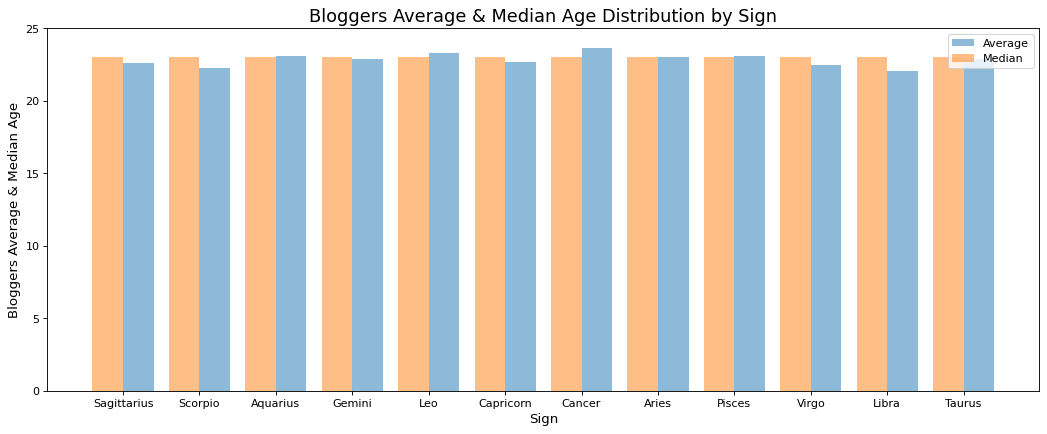

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
g_sign = sf.groupby(["sign"], {"AVG": agg.AVG('age'), "MED": agg.QUANTILE('age',0.5)})
plt.figure(figsize=(16, 6), dpi=80)
barlist = plt.bar(g_sign['sign'], g_sign['AVG'], width=0.4, align='edge', label='Average', alpha=0.5)# g_sign['MED'][0][0]
barlist2 = plt.bar(g_sign['sign'], g_sign['MED'][0][0], width=-0.4, align='edge', label='Median', alpha=0.5)
plt.legend()
plt.ylim(0,25)
plt.ylabel('Bloggers Average & Median Age', fontsize=12)
plt.xlabel('Sign', fontsize=12)
# barlist[1].set_color('r') # changing the bar color
plt.title("Bloggers Average & Median Age Distribution by Sign", fontsize=16)

In [64]:
g_topic_gender = sf.groupby(["gender", "topic"], {"AVG": agg.AVG('age'), "MED": agg.QUANTILE('age',0.5)})
g_male = g_topic_gender[g_topic_gender['gender'] == 'male'].rename({'gender': 'male', 'AVG': 'AVG_male', 'MED': 'MED_male'})
g_female = g_topic_gender[g_topic_gender['gender'] == 'female'].rename({'gender': 'female', 'AVG': 'AVG_female', 'MED': 'MED_female'})
g_topic = g_male.join(g_female, on='topic', how="outer")
g_topic['MED_male'] = g_topic.apply(lambda r: r['MED_male'][0])
g_topic['MED_female'] = g_topic.apply(lambda r: r['MED_female'][0])
g_topic['AVG_total'] = g_topic.apply(lambda r: r['AVG_male'] + r['AVG_female'])
g_topic['MED_total'] = g_topic.apply(lambda r: r['MED_male'] + r['MED_female'])
g_topic

male,topic,AVG_male,MED_male,female,AVG_female,MED_female
male,Non-Profit,24.48876404494382,24.0,female,25.649484536082475,25.0
male,Science,24.75,25.0,female,26.154761904761905,25.0
male,Student,17.321090496024226,16.0,female,17.128680919725692,16.0
male,Construction,29.939393939393938,27.0,female,30.63636363636364,26.0
male,Military,24.416666666666668,24.0,female,22.71875,23.0
male,Banking,26.338461538461537,25.0,female,27.29787234042553,25.0
male,InvestmentBanking,28.26086956521739,25.0,female,25.7,25.0
male,Museums-Libraries,30.136363636363637,26.0,female,28.666666666666668,27.0
male,Technology,27.663171690694625,26.0,female,28.93888888888889,26.0
male,Engineering,25.818181818181817,25.0,female,25.84285714285714,24.0


In [66]:
g_topic_gender['MED'] = g_topic_gender.apply(lambda r: r['MED'][0])
df = g_topic_gender.to_dataframe()
df

,gender,topic,AVG,MED
0,female,Non-Profit,25.649485,25.0
1,male,Non-Profit,24.488764,24.0
2,female,Science,26.154762,25.0
3,male,Science,24.750000,25.0
4,female,Student,17.128681,16.0
...,...,...,...,...
75,female,Accounting,27.283784,25.0
76,female,Fashion,23.273973,24.0
77,male,BusinessServices,26.414634,25.0
78,male,Manufacturing,29.142857,27.0


In [69]:
fig = px.scatter_3d(df, x="topic", y="MED", z="AVG", color="gender")#, hover_name="Name",symbol="Legendary")
fig.show()

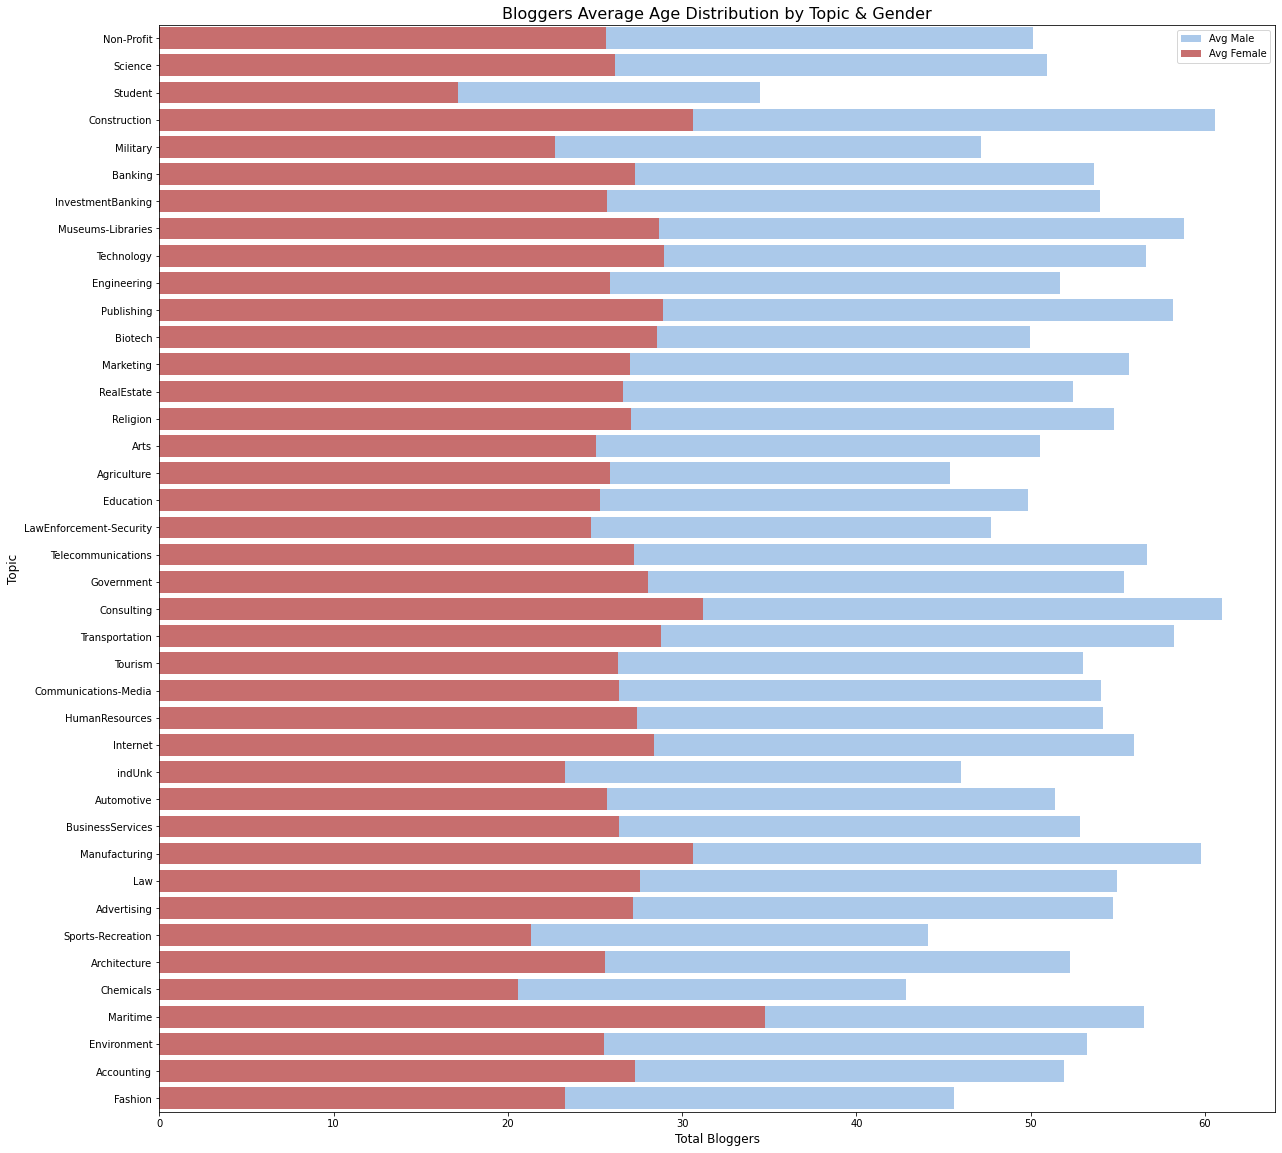

In [49]:
df = g_topic.to_dataframe()
plt.figure(figsize = (20, 20), facecolor = None) 
sns.set_color_codes("pastel")
sns.barplot(x="AVG_total", y="topic", data=df,
            label="Avg Male", color="b")
sns.set_color_codes("muted")
sns.barplot(x="AVG_female", y="topic", data=df,
            label="Avg Female", color="r")
plt.xlabel("Total Bloggers", fontsize=12)
plt.ylabel("Topic", fontsize=12)
plt.title("Bloggers Average Age Distribution by Topic & Gender", fontsize=16)
plt.legend()

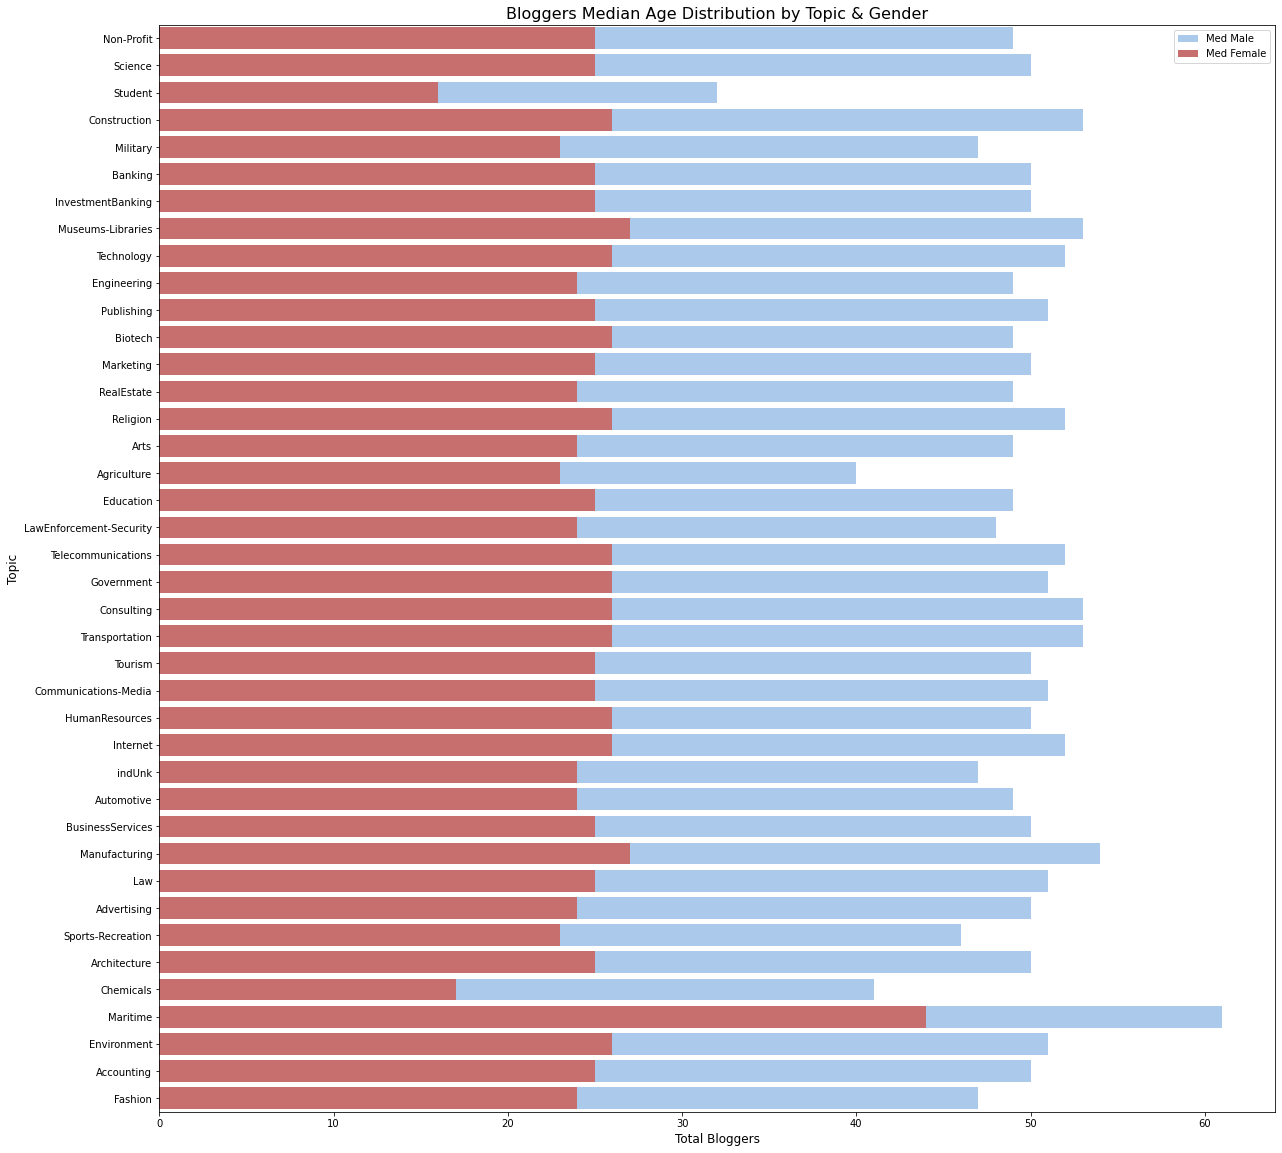

In [50]:
plt.figure(figsize = (20, 20), facecolor = None) 
sns.set_color_codes("pastel")
sns.barplot(x="MED_total", y="topic", data=df,
            label="Med Male", color="b")

sns.set_color_codes("muted")
sns.barplot(x="MED_female", y="topic", data=df,
            label="Med Female", color="r")
plt.xlabel("Total Bloggers", fontsize=12)
plt.ylabel("Topic", fontsize=12)
plt.title("Bloggers Median Age Distribution by Topic & Gender", fontsize=16)
plt.legend()

**Question 5:** Using the  [SJR Journal Ranking of 2018](https://www.scimagojr.com/journalrank.php) dataset and Seaborn, visualize
    the H-index distributions according to the SJR Best Quartile (15pt). Using a grid, visualize the _Cites / Doc. (2years)_ histograms values of each publisher (15pt).
    


In [2]:
!mkdir ./datasets
!mkdir ./datasets/sjr/
!wget -O ./datasets/sjr/sjr2018.csv https://www.scimagojr.com/journalrank.php?out=xls 

--2021-03-28 07:54:09--  https://www.scimagojr.com/journalrank.php?out=xls
Resolving www.scimagojr.com (www.scimagojr.com)... 94.130.25.5
Connecting to www.scimagojr.com (www.scimagojr.com)|94.130.25.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘./datasets/sjr/sjr2018.csv’

./datasets/sjr/sjr2     [         <=>        ]   7.79M  3.76MB/s    in 2.1s    

2021-03-28 07:54:13 (3.76 MB/s) - ‘./datasets/sjr/sjr2018.csv’ saved [8170647]



In [13]:
import turicreate as tc
import seaborn as sns
import matplotlib.pyplot as plt
sf = tc.SFrame.read_csv("./datasets/sjr/sjr2018.csv", delimiter=";", na_values=["-"])
sf = sf.dropna()
sf

Unexpected characters after last column. "19700174914"
Parse failed at token ending at: 
	997-2016";"Medicine (miscellaneous) (Q4)"
22823;19700174914;^"World Heart Journal";journal;"15564002";0,138;Q
Successfully parsed 20 tokens: 
	0: 22822
	1: 30030
	2: Wei sheng  ... e research
	3: journal
	4: 10008020
	5: 0,138
	6: Q4
	7: 21
	8: 0
	9: 64
	10: 0
	11: 15
	12: 64
	13: 0,00
	14: 0,00
	15: China
	16: Asiatic Region
	17: Wei sheng yan jiu
	18: 1997-2016
	19: Medicine ( ... eous) (Q4)

Unexpected characters after last column. ""Visual Arts and Performing Arts (Q3); Archeology (Q4); Archeology (arts and humanities) (Q4)"
28895"
Parse failed at token ending at: 
	cheology (Q4); Archeology (arts and humanities) (Q4)"
28895;^25593;"Journal of the Indiana Dental Association
Successfully parsed 20 tokens: 
	0: ;
	1: Agricultur ... eous) (Q4)
	2: 16200154743
	3: Journal of ... ssociation
	4: journal
	5: 17476704, 00681288
	6: 0,101
	7: Q3
	8: 6
	9: 8
	10: 19
	11: 22
	12: 0
	13: 19
	14: 0,00
	15: 2,75
	16: United Kingdom
	17: Western Europe
	18: Maney Publishing
	19: 1980-1995, 2002-2019

2 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 100 lines in 0.294865 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,str,str,str,str,int,int,int,int,int,int,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "19700174914"
Parse failed at token ending at: 
	997-2016";"Medicine (miscellaneous) (Q4)"
22823;19700174914;^"World Heart Journal";journal;"15564002";0,138;Q
Successfully parsed 20 tokens: 
	0: 22822
	1: 30030
	2: Wei sheng  ... e research
	3: journal
	4: 10008020
	5: 0,138
	6: Q4
	7: 21
	8: 0
	9: 64
	10: 0
	11: 15
	12: 64
	13: 0,00
	14: 0,00
	15: China
	16: Asiatic Region
	17: Wei sheng  ... bian ji bu
	18: 1997-2016
	19: "Medicine  ... Q4)"
22823

Unable to interpret "";"2011-2019"" as a integer
Parse failed at token ending at: 
	";"2011-2019";^"Agricultural and Biological Sciences (miscellan
Successfully parsed 0 tokens:

2 lines failed to parse correctly

Finished parsing file /content/datasets/sjr/sjr2018.csv

Parsing completed. Parsed 22821 lines in 0.193646 secs.

Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index
1,28773,CA - A Cancer Journal forClinicians ...,journal,"15424863, 00079235","88,192",Q1,156
2,19434,MMWR. Recommendations andreports : Morbidity and ...,journal,"10575987, 15458601","41,022",Q1,138
3,21100812243,Nature Reviews Materials,journal,20588437,"36,691",Q1,80
4,29431,Quarterly Journal ofEconomics ...,journal,"00335533, 15314650","36,220",Q1,246
5,20315,Nature Reviews MolecularCell Biology ...,journal,"14710072, 14710080","29,997",Q1,411
6,58530,National vital statisticsreports : from the ...,book series,"15518922, 15518930","29,810",Q1,95
7,18991,Nature Reviews Genetics,journal,"14710056, 14710064","28,619",Q1,345
8,18434,Cell,journal,"00928674, 10974172","24,698",Q1,747
9,29719,Reviews of Modern Physics,journal,"00346861, 15390756","21,938",Q1,316
10,12464,Nature Reviews Cancer,journal,"1474175X, 14741768","21,287",Q1,418


In [18]:
sf2 = sf.remove_columns(["Country", "Categories","Title", "Issn", "Type"] )

def convert_comma_str_to_float(s):
    try:
        return float(s.replace(",", "."))
    except:
        return 0
    
for i in ["SJR", "Cites / Doc. (2years)", "Ref. / Doc."]:
    sf2[i] = sf2[i].apply(lambda s: convert_comma_str_to_float(s)) # replace "," with "." and convert to float
sf2.materialize()
sf2

Rank,Sourceid,SJR,SJR Best Quartile,H index,Total Docs. (2019),Total Docs. (3years),Total Refs.
1,28773,88.192,Q1,156,36,129,2924
2,19434,41.022,Q1,138,4,11,144
3,21100812243,36.691,Q1,80,85,288,8534
4,29431,36.22,Q1,246,30,123,1909
5,20315,29.997,Q1,411,115,382,9251
6,58530,29.81,Q1,95,14,30,379
7,18991,28.619,Q1,345,113,376,8586
8,18434,24.698,Q1,747,581,1881,34924
9,29719,21.938,Q1,316,40,131,11080
10,12464,21.287,Q1,418,138,366,7641


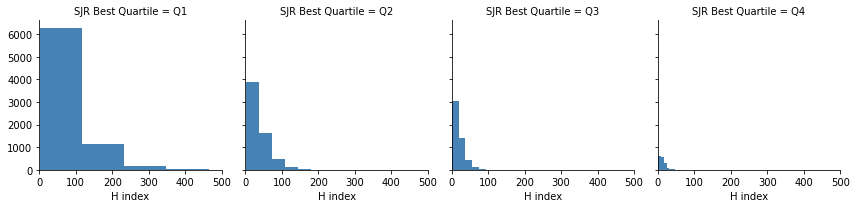

In [19]:
df = sf2.to_dataframe()
g = sns.FacetGrid(df, col="SJR Best Quartile", margin_titles=True, xlim=(0,500), sharex=True) # this will create a grid
g.map(plt.hist, "H index", color="steelblue")

In [ ]:
g = sns.FacetGrid(df, col="Publisher", margin_titles=True, xlim=(0,500), sharex=True) # this will create a grid
g.map(plt.hist, "Cites / Doc. (2years)", color="g")